# New York City Crash Report 
## Group E (NYC Crashers)

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import euclidean_distances
import requests
import datetime


# Reading and Assessment of Data 

In [201]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')
df.info()

C:\Users\jmitc\AppData\Local\Temp\ipykernel_22148\3975778814.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [202]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.837243e+06,1.837243e+06,2.070576e+06,2.070563e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06
mean,4.062766e+01,-7.375207e+01,3.092516e-01,1.489933e-03,5.644081e-02,7.394014e-04,2.675319e-02,1.144599e-04,2.224569e-01,6.128676e-04,3.156009e+06
std,1.981063e+00,3.724374e+00,6.995985e-01,4.071506e-02,2.438824e-01,2.765745e-02,1.633632e-01,1.074303e-02,6.607131e-01,2.709606e-02,1.505039e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066782e+01,-7.397485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.153768e+06
50%,4.072084e+01,-7.392727e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.671536e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.189428e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.707442e+06


In [203]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRASH DATE,09/11/2021,03/26/2022,06/29/2022,09/11/2021,12/14/2021,04/14/2021,12/14/2021,12/14/2021,12/14/2021,12/14/2021
CRASH TIME,2:39,11:45,6:55,9:35,8:13,12:47,17:05,8:17,21:10,14:58
BOROUGH,NaN,NaN,NaN,BROOKLYN,BROOKLYN,NaN,NaN,BRONX,BROOKLYN,MANHATTAN
ZIP CODE,NaN,NaN,NaN,11208.0,11233.0,NaN,NaN,10475.0,11207.0,10017.0
LATITUDE,NaN,NaN,NaN,40.667202,40.683304,NaN,40.709183,40.86816,40.67172,40.75144
LONGITUDE,NaN,NaN,NaN,-73.8665,-73.917274,NaN,-73.956825,-73.83148,-73.8971,-73.97397
LOCATION,NaN,NaN,NaN,"(40.667202, -73.8665)","(40.683304, -73.917274)",NaN,"(40.709183, -73.956825)","(40.86816, -73.83148)","(40.67172, -73.8971)","(40.75144, -73.97397)"
ON STREET NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,THROGS NECK BRIDGE,NaN,SARATOGA AVENUE,MAJOR DEEGAN EXPRESSWAY RAMP,BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3 AVENUE
CROSS STREET NAME,20 AVENUE,NaN,NaN,NaN,DECATUR STREET,NaN,NaN,NaN,NaN,EAST 43 STREET
OFF STREET NAME,NaN,NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,344 BAYCHESTER AVENUE,2047 PITKIN AVENUE,NaN


* Assessment of the data's top values

In [204]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [205]:
for i in range(1,6):
    df_cfv = df["CONTRIBUTING FACTOR VEHICLE "+str(i)].value_counts()
    print(f"===================== Contributing factor {i} =============================")
    print(df_cfv)

===================== Contributing factor 1 =============================
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64
===================== Contributing factor 2 =============================
CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1473382
Driver Inattention/Distraction      94041
Other Vehicular                     31999
Following Too Closely               18977
Failure to Yield Right-of-Way       17088
                                   ...   
Eating or Drinking                     11
Listening

In [206]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           644237
ZIP CODE                          644487
LATITUDE                          233351
LONGITUDE                         233351
LOCATION                          233351
ON STREET NAME                    439198
CROSS STREET NAME                 781957
OFF STREET NAME                  1723769
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6769
CONTRIBUTING FACTOR VEHICLE 2     320567
CONTRIBUTING FACTOR VEHICLE 3    1922727
CONTRIBUTING FACTOR VEHICLE 4    2037228
CONTRIBUTING FACTOR VEHICLE 5    2061565
COLLISION_ID                           0
VEHICLE TYPE COD

Seeeing as Columns CONTRIBUTING FACTOR VEHICLE 3-5 and VEHICLE TYPE CODE 3-5 are columns that are mostly empty we can drop these columns and focus on the main data in order to furhter our analysis.

In [207]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)
df.drop(['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'],axis=1,inplace=True)
df.dropna(subset=['LONGITUDE','LATITUDE','LOCATION'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1837243 entries, 3 to 2070592
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CONTRIB

In [208]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           447751
ZIP CODE                          447975
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                    383090
CROSS STREET NAME                 689559
OFF STREET NAME                  1516197
NUMBER OF PERSONS INJURED             16
NUMBER OF PERSONS KILLED              28
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6166
CONTRIBUTING FACTOR VEHICLE 2     290169
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12443
VEHICLE TYPE CODE 2               360481
dtype: int64

In [209]:
v_type1 = df['VEHICLE TYPE CODE 1'].value_counts()

In [210]:
v_type2 = df['VEHICLE TYPE CODE 2'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'Taxi'),
  Text(5, 0, 'Pick-up Truck'),
  Text(6, 0, 'TAXI'),
  Text(7, 0, '4 dr sedan'),
  Text(8, 0, 'Box Truck'),
  Text(9, 0, 'VAN')])

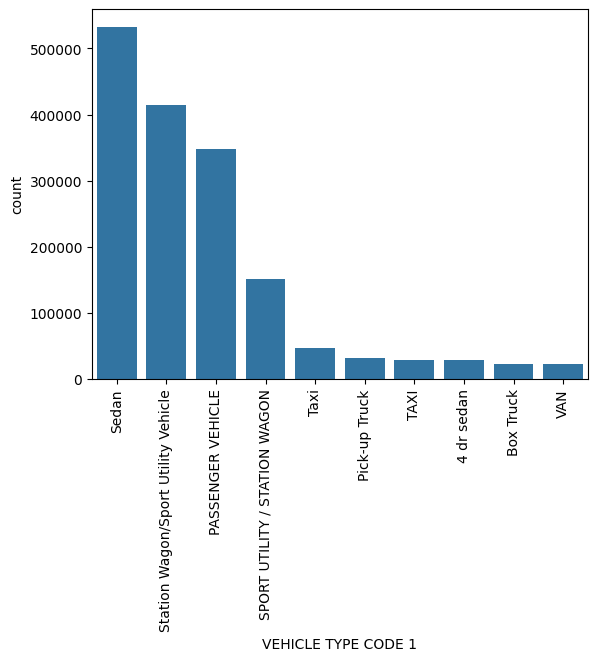

In [211]:
sns.barplot(v_type1[0:10])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'Taxi'),
  Text(6, 0, 'Bike'),
  Text(7, 0, 'Pick-up Truck'),
  Text(8, 0, 'Box Truck'),
  Text(9, 0, 'TAXI')])

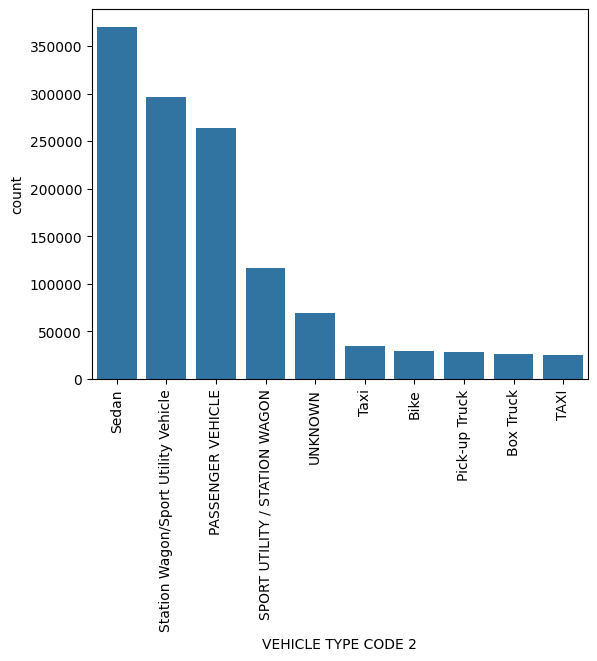

In [212]:
sns.barplot(v_type2[0:10])
plt.xticks(rotation=90)

The API application that is proposed will most likely be built using a K-Means clustering algorithm so in this case the best feature to use would be the longitude and latitude features. However some coordinates are missing so if the street names are provided for those missing rows, the values can be obtained using the OpenStreetMap Nominatim  API.

In [213]:
df_no_locs = df[df['LOCATION'].isna()]
df_street_names = df_no_locs[df_no_locs['ON STREET NAME'].notna()].shape

In [214]:
df.BOROUGH.value_counts()

BOROUGH
BROOKLYN         443410
QUEENS           373962
MANHATTAN        309794
BRONX            204057
STATEN ISLAND     58269
Name: count, dtype: int64

### Utilizing Distance Matrix and euclidean distance to narrow down the New York city Boroughs

In [221]:
# Convert the contributing factors to one coloumn
df['CONTRIBUTING FACTOR'] = df['CONTRIBUTING FACTOR VEHICLE 1'] + " - " + df['CONTRIBUTING FACTOR VEHICLE 2']
df['CONTRIBUTING FACTOR'].value_counts()


CONTRIBUTING FACTOR
Unspecified - Unspecified                                                  459849
Driver Inattention/Distraction - Unspecified                               255444
Following Too Closely - Unspecified                                         83683
Failure to Yield Right-of-Way - Unspecified                                 75653
Driver Inattention/Distraction - Driver Inattention/Distraction             62450
                                                                            ...  
Other Vehicular - Texting                                                       1
Drugs (illegal) - Passing Too Closely                                           1
Traffic Control Device Improper/Non-Working - Pavement Defective                1
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion - Fatigued/Drowsy         1
Following Too Closely - Steering Failure                                        1
Name: count, Length: 1749, dtype: int64

In [223]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           447751
ZIP CODE                          447975
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                    383090
CROSS STREET NAME                 689559
OFF STREET NAME                  1516197
NUMBER OF PERSONS INJURED             16
NUMBER OF PERSONS KILLED              28
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6166
CONTRIBUTING FACTOR VEHICLE 2     290169
COLLISION_ID                           0
VEHICLE TYPE CODE 1                12443
VEHICLE TYPE CODE 2               360481
CONTRIBUTING FACTOR               290169
dtype: int64

In [240]:
#display the total injuries and deaths in the dataset
print(f"Total injuries and deaths in the dataset: {df['NUMBER OF PERSONS INJURED'].sum()} injuries, {df['NUMBER OF PERSONS KILLED'].sum()} deaths")
print(f"Total injuries and deaths in the dataset: {df['NUMBER OF PEDESTRIANS INJURED'].sum()} pedestrian injuries, {df['NUMBER OF PEDESTRIANS KILLED'].sum()} pedestrian deaths")
print(f"Total injuries and deaths in the dataset: {df['NUMBER OF CYCLIST INJURED'].sum()} cyclist injuries, {df['NUMBER OF CYCLIST KILLED'].sum()} cyclist deaths")
print(f"Total injuries and deaths in the dataset: {df['NUMBER OF MOTORIST INJURED'].sum()} motorist injuries, {df['NUMBER OF MOTORIST KILLED'].sum()} motorist deaths")


Total injuries and deaths in the dataset: 570441.0 injuries, 2686.0 deaths
Total injuries and deaths in the dataset: 108675 pedestrian injuries, 1360 pedestrian deaths
Total injuries and deaths in the dataset: 51459 cyclist injuries, 208 cyclist deaths
Total injuries and deaths in the dataset: 403130 motorist injuries, 1072 motorist deaths


In [216]:
#Take the contributing factors and put them into one dataframe
df_cfv1 = df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts().to_frame()
df_cfv2 = df["CONTRIBUTING FACTOR VEHICLE 2"].value_counts().to_frame()

# Merge the two dataframes and make the duplicate values into one
df_cfv = pd.merge(df_cfv1,df_cfv2,left_index=True,right_index=True,how='outer')
# Convert the duplicate values into one
df_cfv['CONTRIBUTING FACTOR'] = df_cfv.max(axis=1)
# Drop the duplicate values

In [217]:
# using the crash date to get the season of the year
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH DATE'].dt.month.value_counts()

CRASH DATE
10    168330
7     164065
9     163475
8     163021
12    160624
11    160120
6     154752
5     153187
1     147534
3     141831
2     134395
4     125909
Name: count, dtype: int64

In [218]:
df_dates = df['CRASH DATE'].dt.year.value_counts().to_frame()
df_dates = df_dates.sort_index()
df_dates

,count
CRASH DATE,
2012,85458
2013,171942
2014,172738
2015,182980
2016,192617
2017,217084
2018,216446
2019,194114
2020,103999


In [219]:
# print the row where the contributing factor 1 is equal to the value 1
df[df['CONTRIBUTING FACTOR VEHICLE 1'] == '80']

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CONTRIBUTING FACTOR
1120662,2016-04-14,14:00,NaN,NaN,40.598274,-74.162530,"(40.598274, -74.16253)",NaN,NaN,2025 RICHMOND AVENUE,...,0,0,0,0,80,80,3430224,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,8080
1121340,2016-04-21,7:55,NaN,NaN,40.671898,-73.922310,"(40.671898, -73.92231)",NaN,NaN,RALPH AVENUE,...,0,0,0,0,80,Unspecified,3418512,Dump,Station Wagon/Sport Utility Vehicle,80Unspecified
1121487,2016-04-17,11:50,QUEENS,11367.0,40.712406,-73.806530,"(40.712406, -73.80653)",Parsons Blvd,NaN,NaN,...,0,0,1,0,80,Unspecified,3425305,4 dr sedan,Station Wagon/Sport Utility Vehicle,80Unspecified
1124591,2016-04-21,10:00,NaN,NaN,40.712110,-73.967560,"(40.71211, -73.96756)",Williamsburg Bridge,NaN,NaN,...,0,0,0,0,80,Unspecified,3406257,Dump,NaN,80Unspecified
1126528,2016-04-20,21:30,NaN,NaN,40.819610,-73.930760,"(40.81961, -73.93076)",Major Deegan Expy,NaN,NaN,...,0,0,0,0,80,Unspecified,3412430,4 dr sedan,Station Wagon/Sport Utility Vehicle,80Unspecified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152394,2016-04-03,8:30,QUEENS,11426.0,40.743385,-73.725130,"(40.743385, -73.72513)",NaN,NaN,245-42 77 CRESCENT,...,0,0,0,0,80,NaN,3423949,4 dr sedan,NaN,NaN
1152509,2016-04-02,17:00,BROOKLYN,11229.0,40.594936,-73.953735,"(40.594936, -73.953735)",NaN,NaN,2283 EAST 17 STREET,...,0,0,0,0,80,NaN,3414883,4 dr sedan,NaN,NaN
1152876,2016-03-27,20:55,BROOKLYN,11207.0,40.687330,-73.910320,"(40.68733, -73.91032)",NaN,NaN,714 EVERGREEN AVENUE,...,0,0,1,0,80,80,3420493,4 dr sedan,4 dr sedan,8080
1153024,2016-04-01,13:10,BROOKLYN,11212.0,40.659336,-73.909070,"(40.659336, -73.90907)",CHESTER STREET,NEWPORT STREET,NaN,...,0,0,0,0,80,Unspecified,3418378,4 dr sedan,Box Truck,80Unspecified


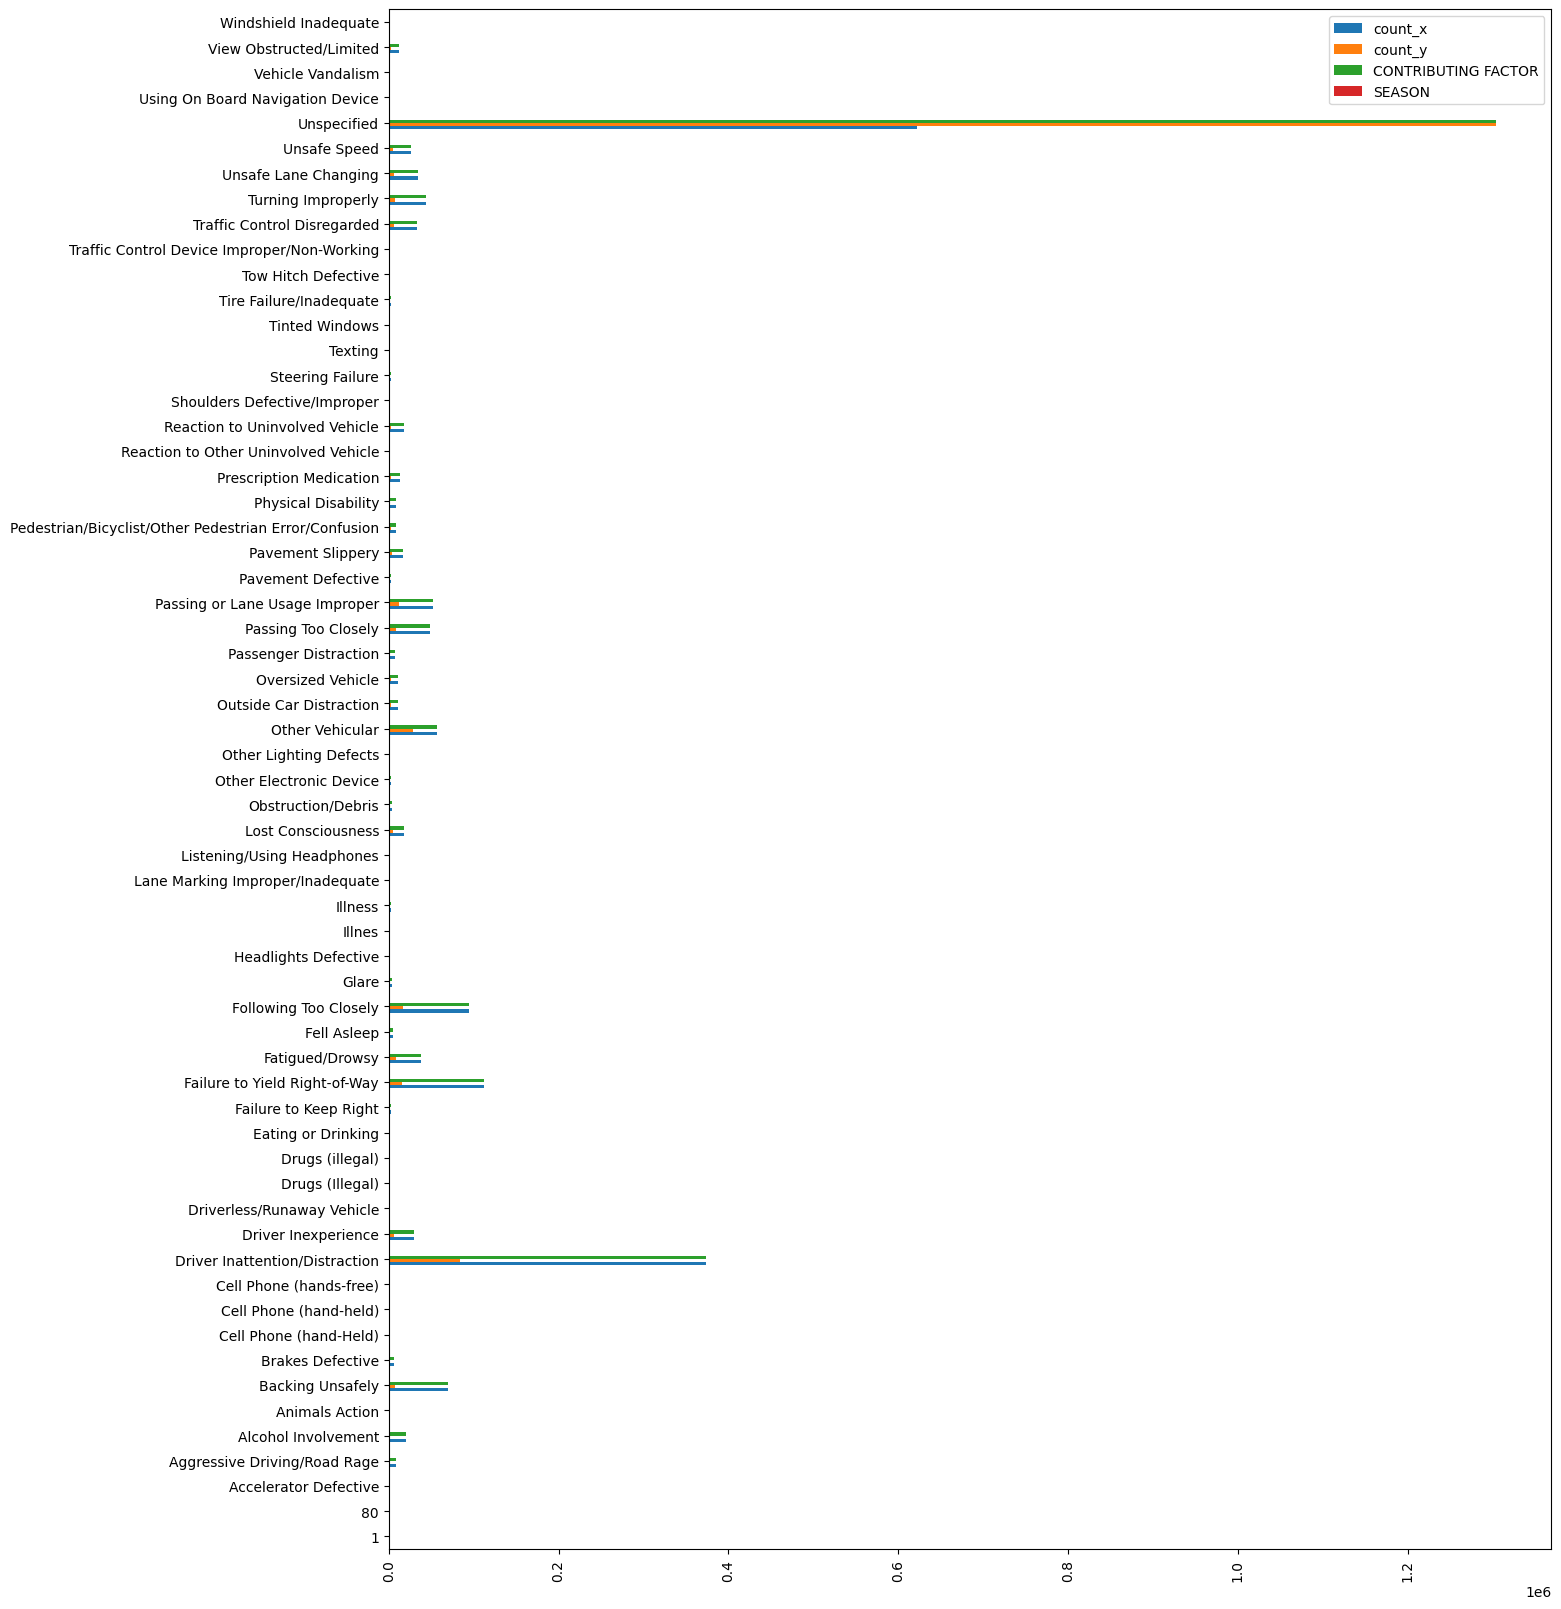

In [220]:
#contributing factors of crashes and the season of the year
df_cfv['SEASON'] = df['CRASH DATE'].dt.month
df_cfv

#plotting the contributing factors of crashes and the season of the year
df_cfv.plot(kind='barh',figsize=(15,20))
plt.xticks(rotation=90)
plt.show()

* Avg injured/killed

* Pain scale index to assess accident severity 

* Frequent contributing factors of accidents

* number of vehicles affected during accidents

* Time of year accident occurance (high risk times)

* Boroughs that are highrisk utilizing certain vehicles

* On Street name location of accidents 